# Story 7
Andrew Bowen     
DATA 608
CUNY Data Science Master's

## Data Sources

- [IEA Critical Minerals Demand Dataset](https://www.iea.org/data-and-statistics/data-product/critical-minerals-demand-dataset)
- [Global Geochemical Database for Critical Minerals](https://www.sciencebase.gov/catalog/file/get/5e616381e4b01d509255c7b6?f=__disk__9f%2Fe3%2F8b%2F9fe38b3bec1b9bc404b14578a226c080fcecf834&allowOpen=true) (USGS)
- [Alliance Dataset](https://data.world/cow/formal-alliances) to enumerate geopolitical

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

In [2]:
demand = pd.read_excel("~/Downloads/CM_Data_explorer.xlsx", sheet_name="3.2 Cleantech demand by mineral")
demand.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Mineral demand for clean energy technologies -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Stated policies scenario,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Net Zero Emissions by 2050 scenario,NaN,NaN,NaN,NaN,NaN
3,NaN,2022.0,NaN,2025,2030.0,2035.0,2040.0,2045.0,2050.0,NaN,...,2040.0,2045.0,2050.0,NaN,2025,2030.0,2035.0,2040.0,2045.0,2050.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
url = "https://www.sciencebase.gov/catalog/file/get/5e616381e4b01d509255c7b6?f=__disk__9f%2Fe3%2F8b%2F9fe38b3bec1b9bc404b14578a226c080fcecf834&allowOpen=true"

r = requests.get(url)
data = r.text

In [6]:
df = pd.read_csv(StringIO(data))

df.head()

,LAB_ID,PREVIOUS_LAB_ID1,PREVIOUS_LAB_ID2,PREVIOUS_LAB_ID3,FIELD_ID,JOB_ID,PREVIOUS_JOB_ID1,PREVIOUS_JOB_ID2,PREVIOUS_JOB_ID3,SUBMITTER,...,Th_ppm_MS_ST,Tl_ppm_MS_ST,Tm_ppm_MS_ST,U_ppm_MS_ST,V_ppm_AES_ST,W_ppm_MS_ST,Y_ppm_MS_ST,Yb_ppm_MS_ST,Zn_ppm_AES_ST,Zr_ppm_AES_ST
0,C355417,NaN,NaN,NaN,RM0001,MRP11968,NaN,NaN,NaN,Rare Metals Task,...,0.2,-0.5,-0.05,0.30,51.0,-1.0,-0.5,-0.1,1290.0,3.8
1,C360759,NaN,NaN,NaN,RM0027,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,9.7,0.5,-0.05,1.75,24.0,28.0,2.3,0.3,-5.0,133.0
2,C360762,NaN,NaN,NaN,RM0030,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,2.6,-0.5,0.08,0.63,-5.0,22.0,5.9,0.6,161.0,16.2
3,C360763,NaN,NaN,NaN,RM0031,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,0.2,-0.5,-0.05,34.80,493.0,11.0,1.9,0.2,29.0,19.1
4,C360769,NaN,NaN,NaN,RM0037,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,2.6,-0.5,0.22,31.20,68.0,8.0,13.0,1.4,4480.0,150.0


In [7]:
df.COUNTRY.unique()

array(['United States', 'Chile', 'South Africa', 'Finland', 'Mexico',
       'Indonesia', 'Norway', 'Canada', 'Russia', 'Japan', 'Philippines',
       'Peru', 'Cuba', 'Australia', 'Burma', 'Portugal', 'Sweden',
       'China', 'Mauritania', 'Brazil', 'Argentina', 'Germany', 'Namibia',
       'Zambia', nan, 'India', 'Poland', 'Democratic Republic of Congo',
       'Vietnam', 'Papua New Guinea', 'Honduras'], dtype=object)

In [30]:
alliances = pd.read_csv('https://query.data.world/s/hxhey6mqsz6rpc74n2il45aruwvmc4?dws=00000')
us_alliances = alliances.loc[(alliances.state_name1 == "United States of America")]

In [31]:
us_alliances['state_name1'] = us_alliances['state_name1'].str.replace("United States of America", "United States")

/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_18862/3732912577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_alliances['state_name1'] = us_alliances['state_name1'].str.replace("United States of America", "United States")


In [52]:
dat = df.loc[df.COUNTRY != "United States"]



dat = df.groupby("COUNTRY").count().reset_index().sort_values("LAB_ID", ascending=False)
dat = dat.merge(us_alliances, left_on="COUNTRY", right_on="state_name2", how="left")
dat.head()


,COUNTRY,LAB_ID,PREVIOUS_LAB_ID1,PREVIOUS_LAB_ID2,PREVIOUS_LAB_ID3,FIELD_ID,JOB_ID,PREVIOUS_JOB_ID1,PREVIOUS_JOB_ID2,PREVIOUS_JOB_ID3,...,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
0,United States,1021,312,8,1,1021,1021,312,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,59,6,0,0,59,59,6,0,0,...,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,4.1
2,Canada,59,6,0,0,59,59,6,0,0,...,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,4.1
3,Canada,59,6,0,0,59,59,6,0,0,...,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,4.1
4,Canada,59,6,0,0,59,59,6,0,0,...,12.0,7.0,1964.0,0.0,0.0,0.0,1.0,0.0,0.0,4.1


In [58]:
# Mapping color values
dat['is_ally'] = np.where(dat['defense'] == 1.0, "b", "r")
dat.head()

,COUNTRY,LAB_ID,PREVIOUS_LAB_ID1,PREVIOUS_LAB_ID2,PREVIOUS_LAB_ID3,FIELD_ID,JOB_ID,PREVIOUS_JOB_ID1,PREVIOUS_JOB_ID2,PREVIOUS_JOB_ID3,...,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version,is_ally
0,United States,1021,312,8,1,1021,1021,312,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,r
1,Canada,59,6,0,0,59,59,6,0,0,...,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,4.1,b
2,Canada,59,6,0,0,59,59,6,0,0,...,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,4.1,b
3,Canada,59,6,0,0,59,59,6,0,0,...,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,4.1,b
4,Canada,59,6,0,0,59,59,6,0,0,...,7.0,1964.0,0.0,0.0,0.0,1.0,0.0,0.0,4.1,r


Text(0, 0.5, 'Country')

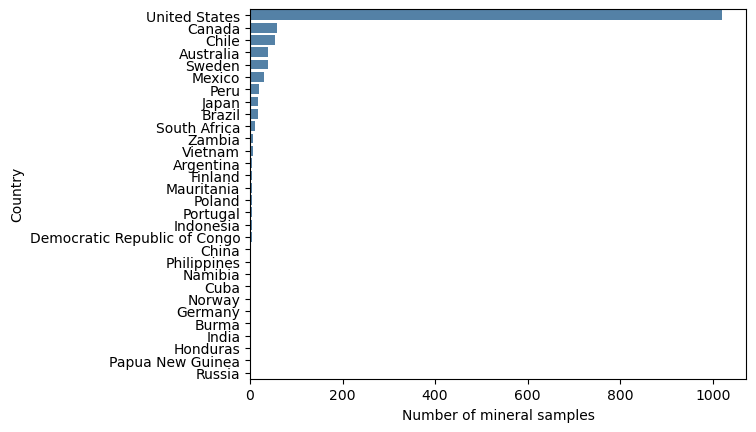

In [62]:
ax = sns.barplot(x="LAB_ID", y="COUNTRY", data=dat, color="steelblue")
ax.set_xlabel("Number of mineral samples")
ax.set_ylabel("Country")

In [50]:
us_alliances.loc[us_alliances.right_censor == 1].head()

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
2352,210,2,United States,20,Canada,13,11,1989,NaN,NaN,NaN,0,1,1,0,1.0,1.0,4.1
2353,210,2,United States,31,Bahamas,3,3,1982,NaN,NaN,NaN,0,1,1,0,1.0,1.0,4.1
2355,210,2,United States,41,Haiti,2,9,1947,NaN,NaN,NaN,0,1,1,0,1.0,1.0,4.1
2356,210,2,United States,42,Dominican Republic,2,9,1947,NaN,NaN,NaN,0,1,1,0,1.0,1.0,4.1
2357,210,2,United States,51,Jamaica,27,6,1969,NaN,NaN,NaN,0,1,1,0,1.0,1.0,4.1
